In [1]:
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt

In [2]:
seq_len = 336
pred_len = 96
folder_path = f'./results/waterG_allNodes_{seq_len}_{pred_len}_PatchTST_custom_ftS_OT*_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0/mse_individual.npy'
files = glob.glob(folder_path)
# files

# PatchTST

mean single2single: 0.4354194990146537
mean single2single: 0.4431890393751041
improve %: 1.7843804372640035


mean single2single: 0.4674667812952841
mean single2single: 0.47237277262410104
improve %: 1.0494844821322205


mean single2single: 0.4844235096897148
mean single2single: 0.48926309623718145
improve %: 0.9990403955758689


mean single2single: 0.5108420142406643
mean single2single: 0.5138431169397347
improve %: 0.5874815726602574




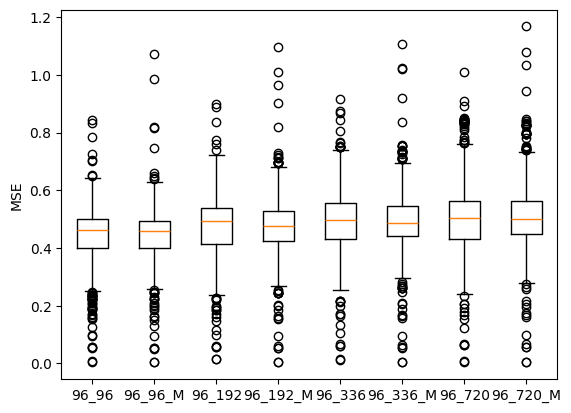

In [18]:
#figure setup
labels = ["96_96", "96_96_M", "96_192", "96_192_M", "96_336", "96_336_M", "96_720", "96_720_M"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for pred_len in [96, 192, 336, 720]:
    folder_path_S = f'./results/waterG_allNodes_{seq_len}_{pred_len}_PatchTST_custom_ftS_OT*_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0/mse_individual.npy'
    folder_path_M = f'./results/waterG_allNodes_{seq_len}_{pred_len}_PatchTST_custom_ftM_OT160MW_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0/mse_individual.npy'
    files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)

    files.sort()
    file_M.sort()

    l = []
    #Read file: single variant
    for f in files:
        mse_S = np.load(f)
        l.append(mse_S[0])
    mean_S = sum(l) / len(l)
    print(f'mean single2single: {mean_S}')
    #Read file: multi variant
    mse_M = np.load(file_M[0])
    mean_M = sum(mse_M) / len(mse_M)
    print(f'mean single2single: {mean_M}')   
    print(f'improve %: {100 * (mean_M - mean_S)/mean_S}')
    print("\n")
    list_all.append(l)
    list_all.append(mse_M)
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.show()

In [16]:
len(list_all[1]) == len(list_all[0]) and len(list_all[1]) == len(files)

True

Text(0.5, 1.0, 'PatchTST - WaterG all Nodes')

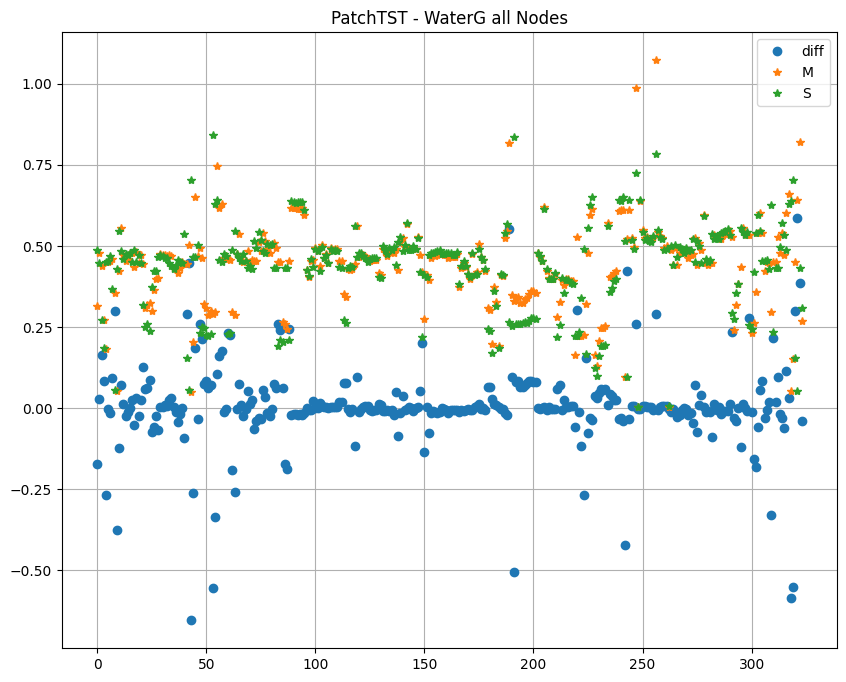

In [29]:
diff = [list_all[1][i] - list_all[0][i] for i in range(len(list_all[0]))]
plt.figure(figsize=(10,8))
plt.plot(diff, 'o', label='diff')
plt.plot(list_all[1], '*', label='M')
plt.plot(list_all[0], '*', label='S')
plt.legend()
plt.grid()
plt.title('PatchTST - WaterG all Nodes')

Text(0.5, 1.0, 'PatchTST - WaterG all Nodes')

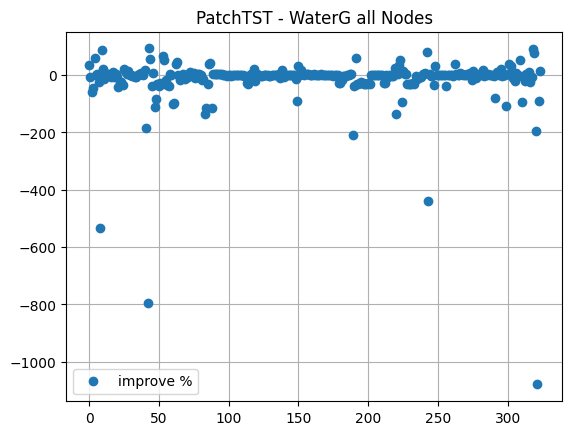

In [4]:
improve = [100 * (list_all[0][i] - list_all[1][i])/list_all[0][i] for i in range(len(list_all[1]))]
plt.plot(improve, 'o', label='improve %')
# plt.plot(list_all[1], '*', label='MS')
# plt.plot(list_all[0], '*', label='S')
plt.legend()
plt.grid()
plt.title("PatchTST - WaterG all Nodes")

In [14]:
pos_imp = [1 if i >= 0 else 0 for e, i in enumerate(improve)]
# pos_sig = [files[i] if i >=0 else 0 for i in pos_imp]
# pos_sig
print(sum(pos_imp))
len(pos_imp)

160


324

# iTransformer

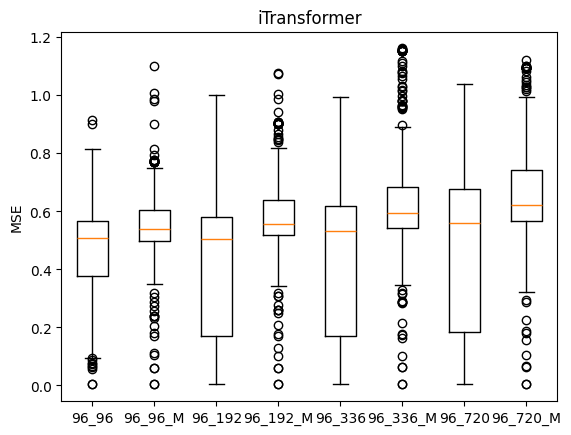

In [45]:
#figure setup
labels = ["96_96", "96_96_M", "96_192", "96_192_M", "96_336", "96_336_M", "96_720", "96_720_M"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for pred_len in [96, 192, 336, 720]:
    folder_path_S = f'/home/abgo/Desktop/Codes/SimpleDL/iTransformer/results/waterG_allNodes_{seq_len}_{pred_len}_iTransformer_custom_ftS_OT*_sl96_ll48_pl{pred_len}_dm512_nh8_el3_dl1_df512_fc1_ebtimeF_dtTrue_Exp_projection/mse_individual.npy'
    folder_path_M = f'/home/abgo/Desktop/Codes/SimpleDL/iTransformer/results/waterG_allNodes_{seq_len}_{pred_len}_iTransformer_custom_ftM_OT160MW_sl{seq_len}_ll48_pl{pred_len}_dm512_nh8_el3_dl1_df512_fc1_ebtimeF_dtTrue_Exp_projection/mse_individual.npy'
    files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)

    files.sort()
    file_M.sort()

    l = []
    #Read file: single variant
    for f in files:
        mse_S = np.load(f)
        l.append(mse_S[0])
    #Read file: multi variant
    mse_M = np.load(file_M[0])
    # print("\n")
    # print(sum(l) / len(l) )   
    list_all.append(l)
    list_all.append(mse_M)
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('iTransformer')
plt.show()

In [ ]:
diff = [list_all[1][i] - list_all[0][i] for i in range(len(list_all[0]))]
plt.plot(diff, 'o', label='diff')
plt.plot(list_all[1], '*', label='M')
plt.plot(list_all[0], '*', label='S')
plt.legend()

In [46]:
len(list_all[0])



214

In [ ]:
seq_len = 96
pred_len = 96
folder_path_M = f'/home/abgo/Desktop/Codes/SimpleDL/iTransformer/results/waterG_allNodes_{seq_len}_{pred_len}_iTransformer_custom_ftS_OT*_sl{seq_len}_ll48_pl{pred_len}_dm512_nh8_el3_dl1_df512_fc1_ebtimeF_dtTrue_Exp_projection/mse_individual.npy'
file_M = glob.glob(folder_path_M)
file_M.sort()
file_M


Compare Single variant and Multi-to-Single variant prediction of iTransformer,

Weather_noOutlier dataset

prediction length: 96
0.22438927118976912
0.24779288382047698




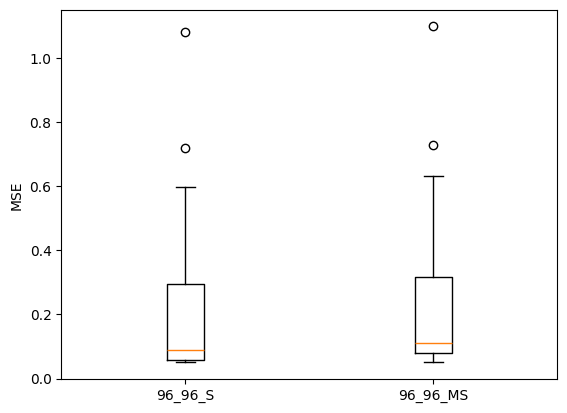

In [30]:
#figure setup
labels = ["96_96_S", "96_96_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for pred_len in [96]:
    folder_path_S = f'/home/abgo/Desktop/Codes/SimpleDL/iTransformer/results/weather_noOutlier_{seq_len}_{pred_len}_iTransformer_custom_ftS_OT*_sl96_ll48_pl{pred_len}_dm512_nh8_el3_dl1_df512_fc1_ebtimeF_dtTrue_Exp_projection/mse_individual.npy'
    folder_path_M = f'/home/abgo/Desktop/Codes/SimpleDL/iTransformer/results/weather_noOutlier_{seq_len}_{pred_len}_iTransformer_custom_ftMS_OT*_sl96_ll48_pl{pred_len}_dm512_nh8_el3_dl1_df512_fc1_ebtimeF_dtTrue_Exp_projection/mse_individual.npy'
    files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)

    files.sort()
    file_M.sort()

    l = []
    #Read file: single variant
    for f in files:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    
    print(f'prediction length: {pred_len}')
    print(sum(l) / len(l) )   
    #Read file: multi variant to single variant prediction
    l = []
    for f in file_M:
        mse_M = np.load(f)
        l.append(mse_M[0])
    list_all.append(l) 

    print(sum(l) / len(l) )   
    print("\n")
    # list_all.append(mse_M)
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.show()

Text(0.5, 1.0, 'iTransformer - weather no Outlier')

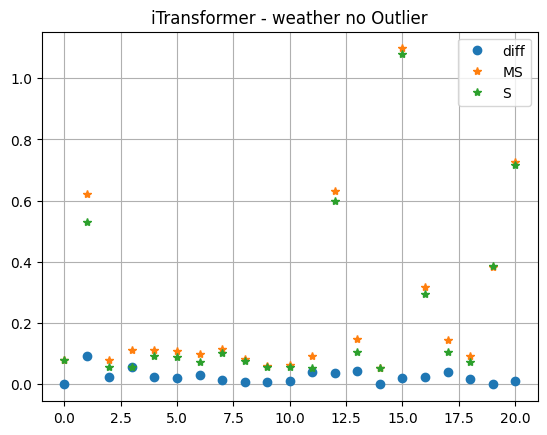

In [31]:
diff = [list_all[1][i] - list_all[0][i] for i in range(len(list_all[0]))]
plt.plot(diff, 'o', label='diff')
plt.plot(list_all[1], '*', label='MS')
plt.plot(list_all[0], '*', label='S')
plt.legend()
plt.grid()
plt.title("iTransformer - weather no Outlier")

## Compare PatchTST and iTransformer

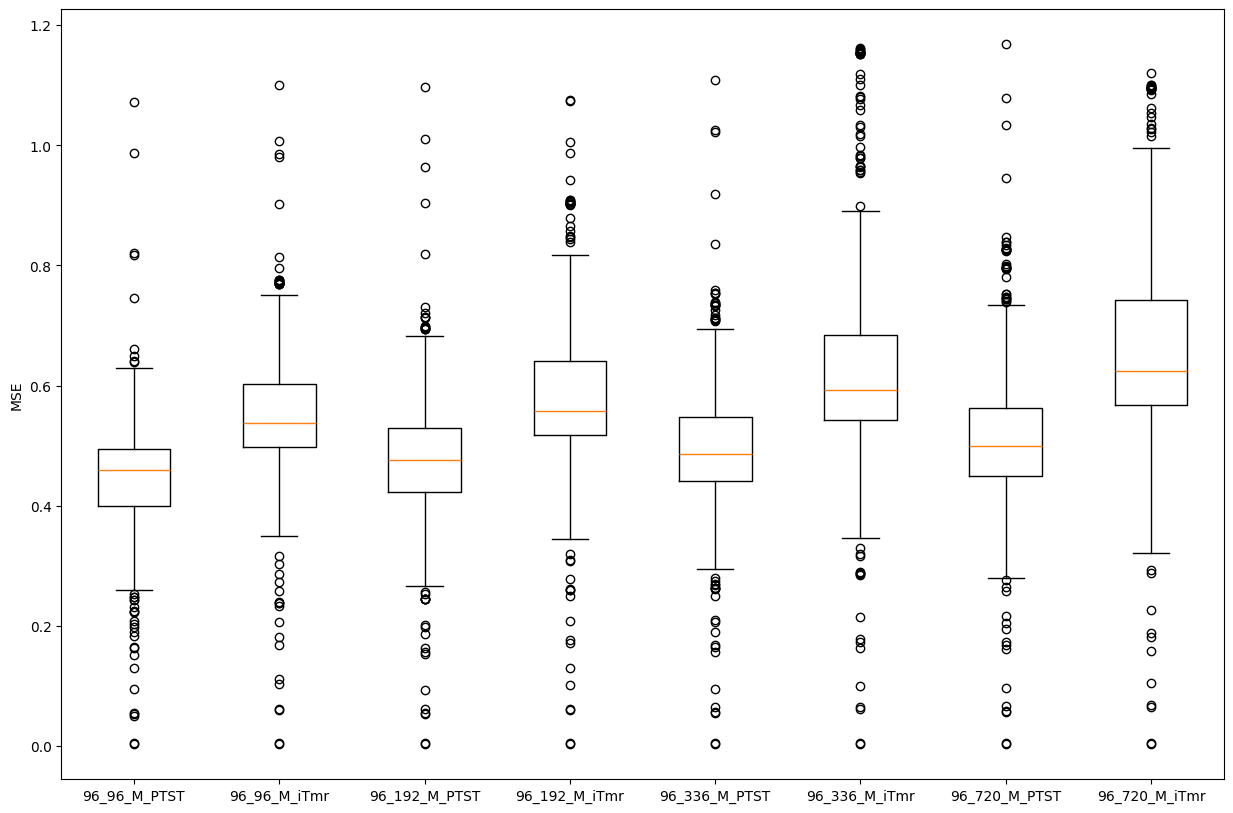

In [6]:
#figure setup
labels = ["96_96_M_PTST", "96_96_M_iTmr", "96_192_M_PTST", "96_192_M_iTmr", "96_336_M_PTST", "96_336_M_iTmr", "96_720_M_PTST", "96_720_M_iTmr"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for pred_len in [96, 192, 336, 720]:
    '''PatchTST'''
    # folder_path_S = f'/home/abgo/Desktop/Codes/SimpleDL/iTransformer/results/waterG_allNodes_{seq_len}_{pred_len}_iTransformer_custom_ftS_OT*_sl96_ll48_pl{pred_len}_dm512_nh8_el3_dl1_df512_fc1_ebtimeF_dtTrue_Exp_projection/mse_individual.npy'
    folder_path_M = f'./results/waterG_allNodes_{seq_len}_{pred_len}_PatchTST_custom_ftM_OT160MW_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0/mse_individual.npy'
    # files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)

    # l = []
    # #Read file: single variant
    # for f in files:
    #     mse_S = np.load(f)
    #     l.append(mse_S[0])
    #Read file: multi variant
    mse_M = np.load(file_M[0])  
    # list_all.append(l)
    list_all.append(mse_M)
    '''iTransformer'''
    # folder_path_S = f'/home/abgo/Desktop/Codes/SimpleDL/iTransformer/results/waterG_allNodes_{seq_len}_{pred_len}_iTransformer_custom_ftS_OT*_sl96_ll48_pl{pred_len}_dm512_nh8_el3_dl1_df512_fc1_ebtimeF_dtTrue_Exp_projection/mse_individual.npy'
    folder_path_M = f'/home/abgo/Desktop/Codes/SimpleDL/iTransformer/results/waterG_allNodes_{seq_len}_{pred_len}_iTransformer_custom_ftM_OT160MW_sl{seq_len}_ll48_pl{pred_len}_dm512_nh8_el3_dl1_df512_fc1_ebtimeF_dtTrue_Exp_projection/mse_individual.npy'
    # files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)

    # l = []
    # #Read file: single variant
    # for f in files:
    #     mse_S = np.load(f)
    #     l.append(mse_S[0])
    #Read file: multi variant
    mse_M = np.load(file_M[0])  
    # list_all.append(l)
    list_all.append(mse_M)
plt.figure(figsize=(15,10))
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.show()

PatchTST single prediction: compare training seperately with using individual=1

waterG all Nodes

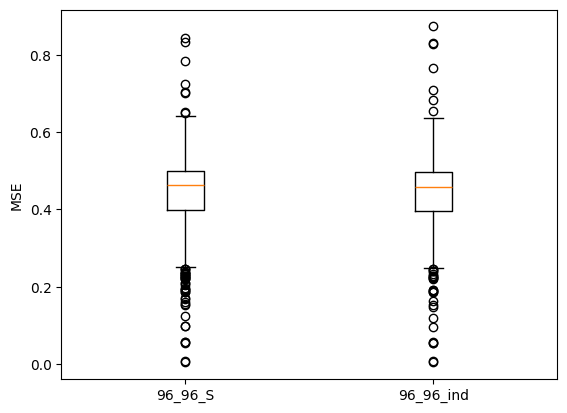

In [27]:
#figure setup
labels = ["96_96_S", "96_96_ind"]#, "96_192", "96_192_ind", "96_336", "96_336_ind", "96_720", "96_720_ind"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for pred_lenn in [96]:
    folder_path_S = f'./results/waterG_allNodes_{seq_len}_{pred_len}_PatchTST_custom_ftS_OT*_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0/mse_individual.npy'
    folder_path_M = f'./results/waterG_allNodes_{seq_len}_{pred_len}_PatchTST_custom_ftM_OT160MW_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_ind1/mse_individual.npy'
    files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)

    l = []
    #Read file: single variant
    for f in files:
        mse_S = np.load(f)
        l.append(mse_S[0])
    #Read file: multi variant, individual=1
    mse_M = np.load(file_M[0])
    list_all.append(l)
    list_all.append(mse_M)
# plt.figure(figsize=(5,5))
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.show()

weather

In [6]:
#figure setup
labels = ["96_96", "96_96_M", "96_192", "96_192_M", "96_336", "96_336_M", "96_720", "96_720_M"]
#read data
seq_len = 336
pred_len = 96
list_all = []
for pred_lenn in [96, 192, 336, 720]:
    folder_path_S = f'./results/waterG_allNodes_{seq_len}_{pred_len}_PatchTST_custom_ftS_OT160MW_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_ind1/mse_individual.npy'
    folder_path_M = f'./results/waterG_allNodes_{seq_len}_{pred_len}_PatchTST_custom_ftM_OT160MW_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0/mse_individual.npy'
    files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)

    l = []
    #Read file: single variant
    for f in files:
        mse_S = np.load(f)
        l.append(mse_S[0])
    #Read file: multi variant, individual=1
    mse_M = np.load(file_M[0])
    list_all.append(l)
    list_all.append(mse_M)
plt.figure(figsize=(10,5))
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.show()

[]

## Weather (public) dataset
compare Single and Multi variant prediction



prediction length: 96
0.20121095773010028
0.1988197604105586


prediction length: 192
0.2550811572443871
0.2541138611379124


prediction length: 336
0.31295668262810933
0.3123492162142481


prediction length: 720
0.4017999344283626
0.3903192022726649


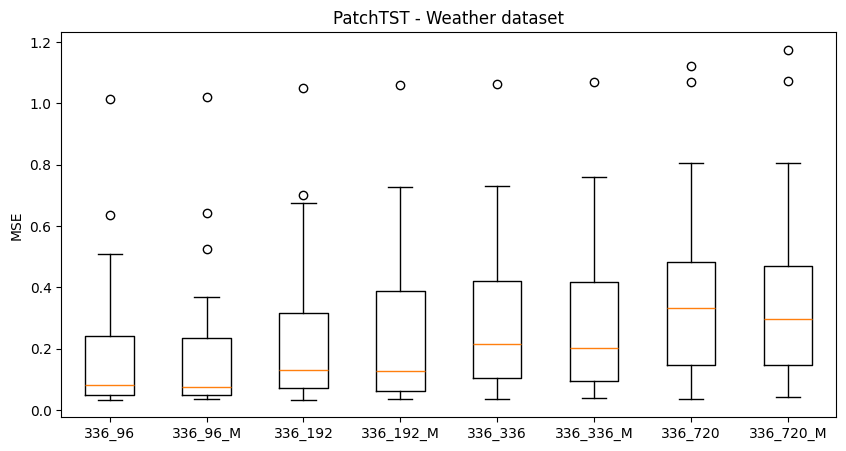

In [21]:
#figure setup
labels = ["336_96", "336_96_M", "336_192", "336_192_M", "336_336", "336_336_M", "336_720", "336_720_M"]
#read data
seq_len = 336
pred_len = 96
list_all = []
for pred_len in [96, 192, 336, 720]:
    folder_path_S = f'./results/weather_noOutlier_{seq_len}_{pred_len}_PatchTST_custom_ftS_OT*_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_M = f'./results/weather_noOutlier_{seq_len}_{pred_len}_PatchTST_custom_ftM_OTOT_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    # ./results/weather_noOutlier_336_96_PatchTST_custom_ftM_OTOT_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_ind0
    files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)

    l = []
    #Read file: single variant
    for f in files:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    #Read file: multi variant
    mse_M = np.load(file_M[0])
    list_all.append(mse_M)
    
    print("\n")
    print(f'prediction length: {pred_len}')
    print(sum(l) / len(l) )   
    print(sum(mse_M) / len(mse_M) )   

plt.figure(figsize=(10,5))
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('PatchTST - Weather dataset')
plt.show()

Text(0.5, 1.0, 'MyConvLinear - weather no Outlier')

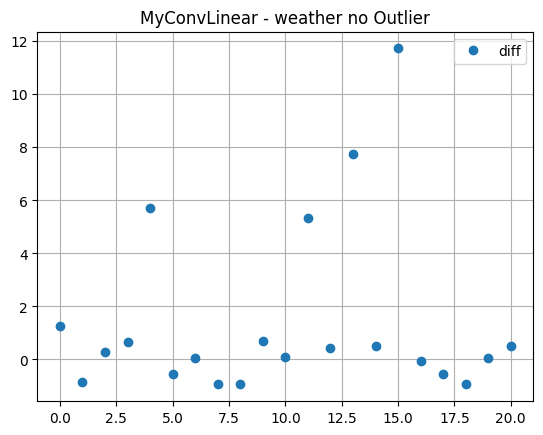

In [23]:
diff = [(list_all[1][i] - list_all[0][i])/list_all[0][i] for i in range(len(list_all[1]))]
plt.plot(diff, 'o', label='diff')
# plt.plot(list_all[1], '*', label='MS')
# plt.plot(list_all[0], '*', label='S')
plt.legend()
plt.grid()
plt.title("MyConvLinear - weather no Outlier")



prediction length: 96
0.19372526414337612
0.1988197604105586
0.21408001315735636


prediction length: 192
0.24509304123265402
0.2541138611379124
0.2667799714420523


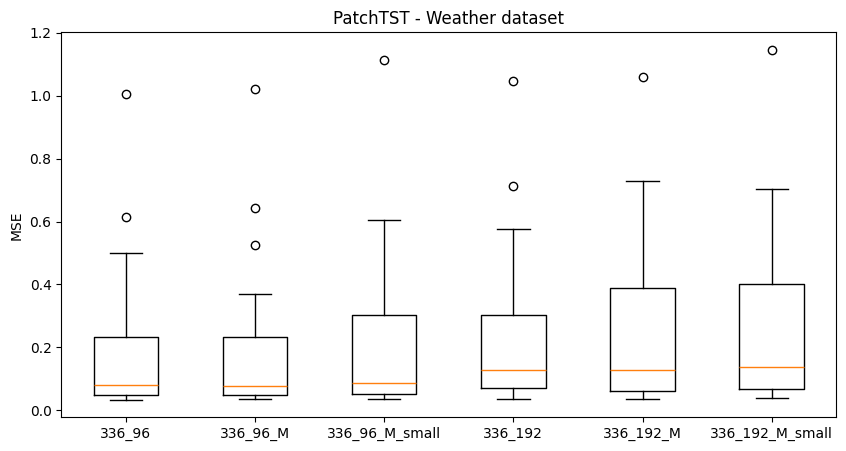

In [34]:
#figure setup
labels = ["336_96", "336_96_M", "336_96_M_small", "336_192", "336_192_M", "336_192_M_small"]
#read data
seq_len = 336
pred_len = 96
list_all = []
for pred_len in [96, 192]:
    folder_path_S = f'./results/weather_noOutlier_{seq_len}_{pred_len}_PatchTST_custom_ftS_OT*_sl{seq_len}_ll48_pl{pred_len}_dm16_nh4_el1_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_M = f'./results/weather_noOutlier_{seq_len}_{pred_len}_PatchTST_custom_ftM_OTOT_sl{seq_len}_ll48_pl{pred_len}_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_M_small = f'./results/weather_noOutlier_{seq_len}_{pred_len}_PatchTST_custom_ftM_OTOT_sl{seq_len}_ll48_pl{pred_len}_dm16_nh4_el1_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    # ./results/weather_noOutlier_336_96_PatchTST_custom_ftM_OTOT_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_ind0
    files = glob.glob(folder_path_S)
    file_M = glob.glob(folder_path_M)
    file_M_small = glob.glob(folder_path_M_small)

    l = []
    #Read file: single variant
    for f in files:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    #Read file: multi variant
    mse_M = np.load(file_M[0])
    list_all.append(mse_M)
    #Read file: multi variant
    mse_M_small = np.load(file_M_small[0])
    list_all.append(mse_M_small)
    
    print("\n")
    print(f'prediction length: {pred_len}')
    print(sum(l) / len(l) )   
    print(sum(mse_M) / len(mse_M) )   
    print(sum(mse_M_small) / len(mse_M_small) )   

plt.figure(figsize=(10,5))
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('PatchTST - Weather dataset')
plt.show()

prediction length: 96
0.19372526414337612
0.19861191582112087




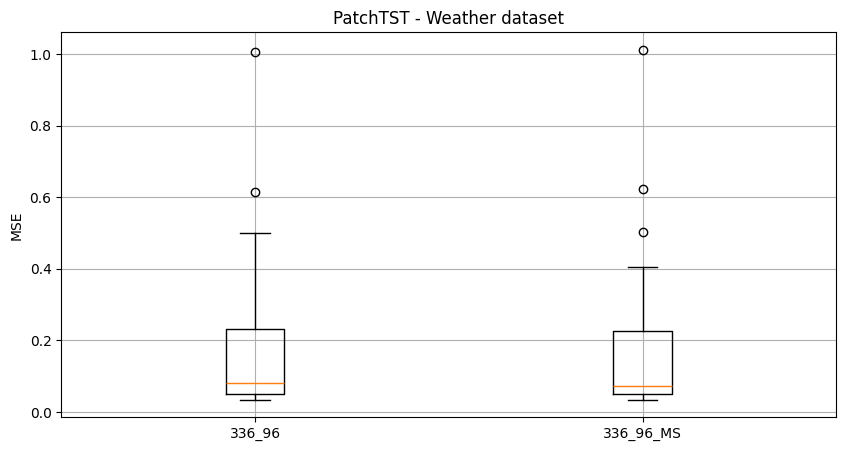

In [4]:
#figure setup
labels = ["336_96", "336_96_MS"]
#read data
seq_len = 336
pred_len = 96
list_all = []
for pred_len in [96]:
    folder_path_S = f'./results/weather_noOutlier_{seq_len}_{pred_len}_PatchTST_custom_ftS_OT*_sl{seq_len}_ll48_pl{pred_len}_dm16_nh4_el1_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_allMS = f'./results/weather_noOutlier_{seq_len}_{pred_len}_PatchTST_custom_ftMSall_OT*_sl{seq_len}_ll48_pl{pred_len}_dm16_nh4_el1_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    # /home/abgo/Desktop/Codes/SimpleDL/PatchTST/PatchTST_supervised/results/weather_noOutlier_336_96_PatchTST_custom_ftMSall_OTmax_wv_sl336_ll48_pl96_dm16_nh4_el1_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0_ind0
    files = glob.glob(folder_path_S)
    file_MS = glob.glob(folder_path_allMS)

    files.sort()
    file_MS.sort()

    l = []
    #Read file: single variant
    for f in files:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    print(f'prediction length: {pred_len}')
    print(sum(l) / len(l) )   
    #Read file: multi variant to single variate
    l = []
    for f in file_MS:
        mse_MS = np.load(f)
        l.append(mse_MS[0])
    list_all.append(l)
    
    print(sum(l) / len(l) ) 
    print("\n")
    

plt.figure(figsize=(10,5))
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('PatchTST - Weather dataset')
plt.grid()
plt.show()

In [3]:
list_all[1].__len__()

21

Text(0.5, 1.0, 'iTransformer - weather no Outlier')

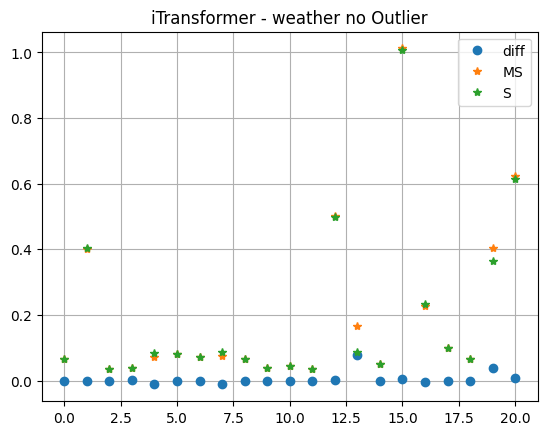

In [5]:
diff = [list_all[1][i] - list_all[0][i] for i in range(len(list_all[0]))]
plt.plot(diff, 'o', label='diff')
plt.plot(list_all[1], '*', label='MS')
plt.plot(list_all[0], '*', label='S')
plt.legend()
plt.grid()
plt.title("iTransformer - weather no Outlier")

# My Transformer
#### Weather dataset

Grid search

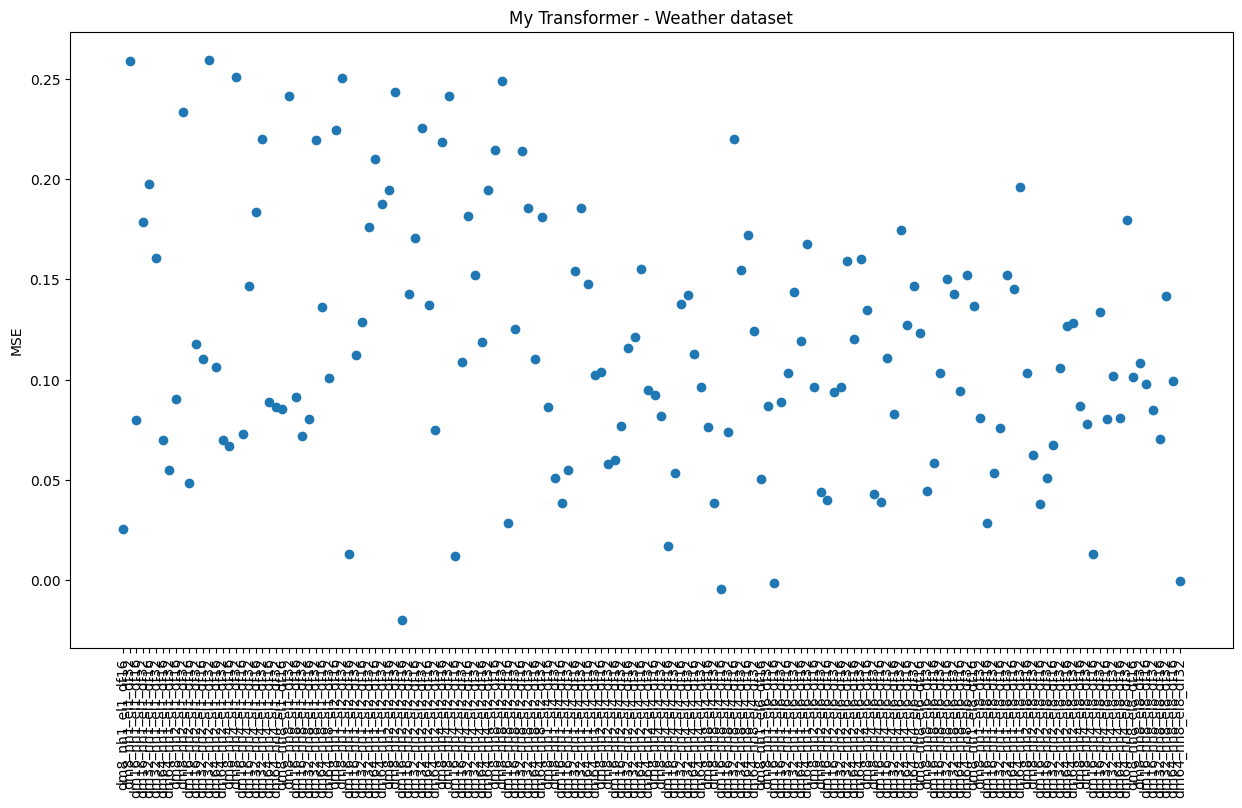

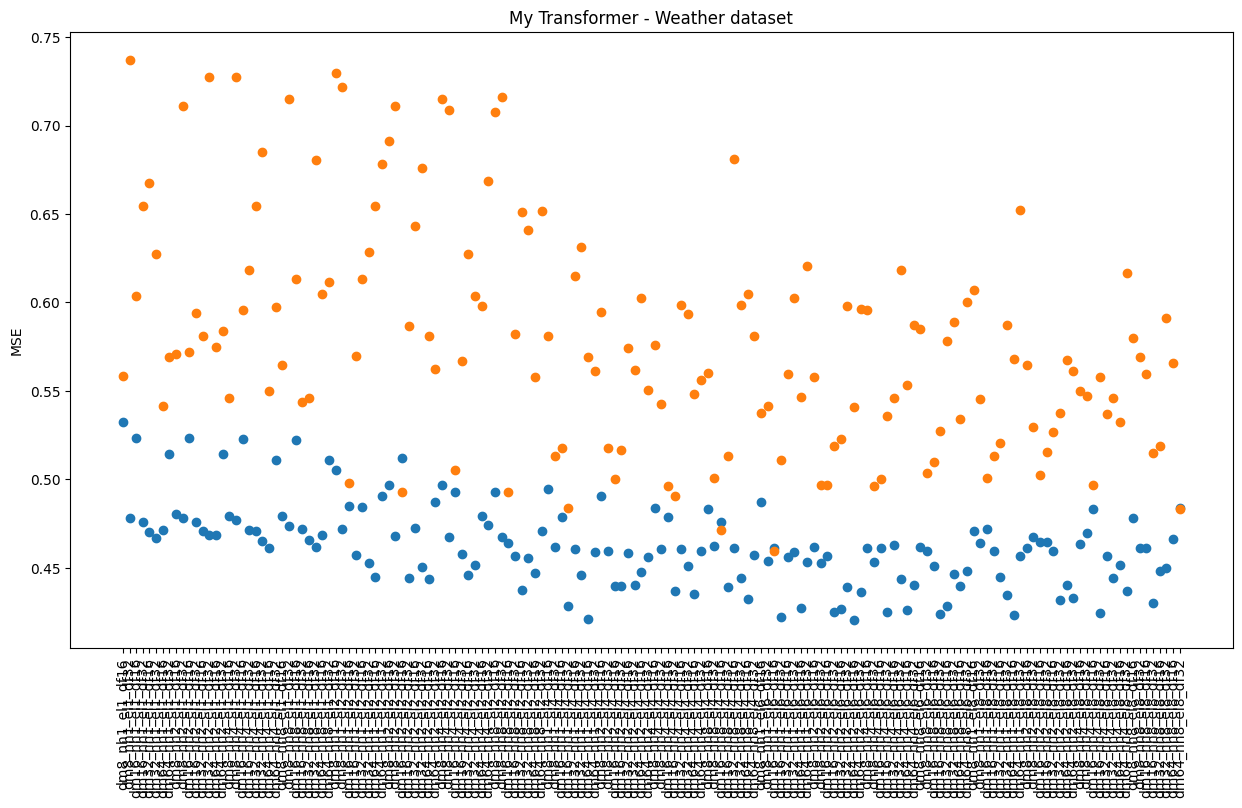

In [3]:
#figure setup
labels = []
#read data
seq_len = 96
pred_len = 96
list_all = []
list_S = []
list_MS = []
for e_layers in [1, 2, 4, 6, 8]: 
    for n_heads in [1, 2, 4, 6, 8]:
        for d_model in [8, 16, 32, 64]:
            for d_ff in [16, 32]:
# for pred_len in [96]:
                folder_path_S = f'./results/weather_noOutlier_{seq_len}_{pred_len}_MyTransformer_custom_ftS_OTOT_sl{seq_len}_ll48_pl{pred_len}_dm{d_model}_nh{n_heads}_el{e_layers}_dl1_df{d_ff}_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
                folder_path_MS = f'./results/weather_noOutlier_{seq_len}_{pred_len}_MyTransformer_custom_ftMS_OTOT_sl{seq_len}_ll48_pl{pred_len}_dm{d_model}_nh{n_heads}_el{e_layers}_dl1_df{d_ff}_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
                file_S = glob.glob(folder_path_S)
                file_MS = glob.glob(folder_path_MS)
                
                # assert file_S != None and file_MS != None
                try:
                    mse_S = np.load(file_S[0])
                    mse_MS = np.load(file_MS[0])

                    list_S.append(mse_S)
                    list_MS.append(mse_MS)
                    list_all.append(mse_MS - mse_S)  
                    labels.append(f'dm{d_model}_nh{n_heads}_el{e_layers}_df{d_ff}')
                except:
                    pass
    

plt.figure(figsize=(15,8))
plt.plot(labels, list_all, 'o')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title('My Transformer - Weather dataset')
plt.show()

plt.figure(figsize=(15,8))
plt.plot(labels, list_S, 'o')
plt.plot(labels, list_MS, 'o')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title('My Transformer - Weather dataset')
# plt.grid()
plt.show()


In [ ]:
folder_path_MS = f'./results/weather_noOutlier_{seq_len}_{pred_len}_MyTransformer_custom_ftMS_OT*_sl{seq_len}_ll48_pl{pred_len}_dm32_nh*_el*_dl1_df*_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
glob.glob(folder_path_MS)

In [4]:
len(list_all)

160

In [ ]:
min(list_all)
[i if i < 0 else None for i in list_all]

In [31]:
argmin = list_all.index(min(list_all))
print(argmin)
print(list_all[argmin])
labels[argmin]

98
[-0.02318412]


'dm16_nh1_el6_df16'

Test best model from grid search on all nodes

In [ ]:
file_MS

0.221062618352118
0.2344879839746725


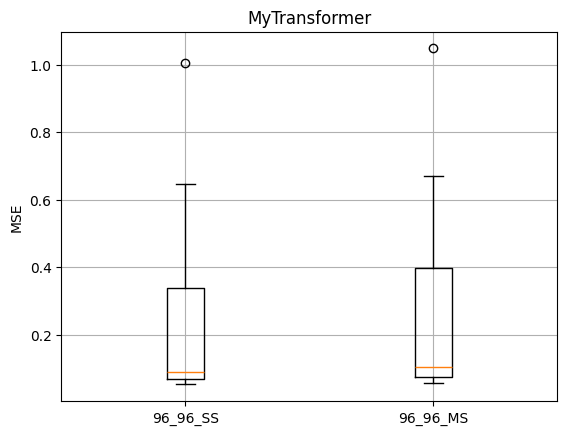

In [10]:
#figure setup
labels = ["96_96_SS", "96_96_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
list_S = []
list_MS = []

e_layers = 6
n_heads = 1
d_model = 8
d_ff = 16
# for pred_len in [96]:
folder_path_SS = f'./results/weather_noOutlier_96_96_MyTransformer_custom_ftS_OT*_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
folder_path_MS = f'./results/weather_noOutlier_96_96_MyTransformer_custom_ftMS_OT*_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'

file_SS = glob.glob(folder_path_SS)
file_MS = glob.glob(folder_path_MS)

file_SS.sort()
file_MS.sort()

l = []
#Read file: single2single variate
for f in file_SS:
    mse_S = np.load(f)
    l.append(mse_S[0])
list_all.append(l)
print(sum(l) / len(l) )
#Read file: multi2single variate
l = []
for f in file_MS:
    mse_S = np.load(f)
    l.append(mse_S[0])
list_all.append(l)
print(sum(l) / len(l) )
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('MyTransformer')
plt.grid()
plt.show()

Text(0.5, 1.0, 'MyTransformer - weather no Outlier')

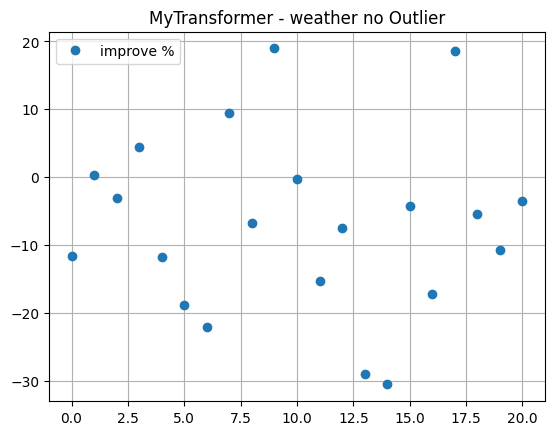

In [11]:
improve = [100 * (list_all[0][i] - list_all[1][i])/list_all[0][i] for i in range(len(list_all[1]))]
plt.plot(improve, 'o', label='improve %')
# plt.plot(list_all[1], '*', label='MS')
# plt.plot(list_all[0], '*', label='S')
plt.legend()
plt.grid()
plt.title("MyTransformer - weather no Outlier")

In [26]:
[i if i >= 0 else 0 for i in diff]

[0,
 0.28286523155538057,
 0,
 4.384114816792964,
 0,
 0,
 0,
 9.479286931345884,
 0,
 18.966346131269695,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18.53225936347586,
 0,
 0,
 0]

In [30]:
max(diff)
min(diff)

-30.532899135811377

In [16]:
pos_imp = [file_MS[e] if i >= 0 else 0 for e, i in enumerate(improve)]
# pos_sig = [file_MS[i] if i >=0 else 0 for i in pos_imp]
pos_imp

[0,
 './results/weather_noOutlier_96_96_MyTransformer_custom_ftMS_OTOT_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 0,
 './results/weather_noOutlier_96_96_MyTransformer_custom_ftMS_OTSWDR_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 0,
 0,
 0,
 './results/weather_noOutlier_96_96_MyTransformer_custom_ftMS_OTTpot_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 0,
 './results/weather_noOutlier_96_96_MyTransformer_custom_ftMS_OTVPdef_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 './results/weather_noOutlier_96_96_MyTransformer_custom_ftMS_OTrho_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 0,
 0,
 0]

Train with only 5 improved time series from last cell 

0.17166752070188523
0.17272689938545227


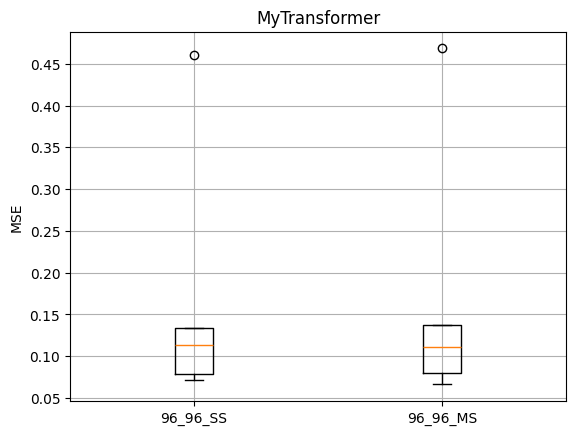

In [19]:
#figure setup
labels = ["96_96_SS", "96_96_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
list_S = []
list_MS = []

e_layers = 6
n_heads = 1
d_model = 8
d_ff = 16
# for pred_len in [96]:

file_SS = []
file_MS = []
for signal in ['Tpot', 'VPdef', 'rho', 'SWDR', 'OT']:
    folder_path_SS = f'./results/weather_noOutlier_96_96_MyTransformer_custom_ftS_OT{signal}_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_MS = f'./results/weather_noOutlier_limited5_96_96_MyTransformer_custom_ftMS_OT{signal}_sl96_ll48_pl96_dm16_nh1_el6_dl1_df16_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'

    file_SS.append(glob.glob(folder_path_SS)[0])
    file_MS.append(glob.glob(folder_path_MS)[0])

file_SS.sort()
file_MS.sort()

l = []
#Read file: single2single variate
for f in file_SS:
    mse_S = np.load(f)
    l.append(mse_S[0])
list_all.append(l)
print(sum(l) / len(l) )
#Read file: multi2single variate
l = []
for f in file_MS:
    mse_S = np.load(f)
    l.append(mse_S[0])
list_all.append(l)
print(sum(l) / len(l) )
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('MyTransformer')
plt.grid()
plt.show()

## HydroVu V1.0

1.4127065874636173
1.2290081456303596
13.00329760357889 %


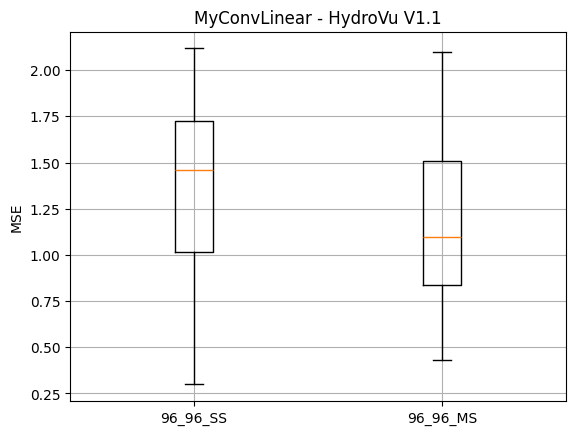

In [12]:
#figure setup
# labels = ["96_96_SS", "96_96_MS", "96_192_SS", "96_192_MS"]
labels = ["96_96_SS", "96_96_MS"]
# labels = ["96_192_SS", "96_192_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for random_seed in [2021]:
    folder_path_SS = f'./results/hydrovu_v1_0_MyTransformer_custom_ftS_OT*_sl96_ll48_pl96_dm8_nh1_el6_dl1_df8_fc1_ebtimeF_dtTrue_Exp_0_ind0*/mse_individual.npy'
    folder_path_MS = f'./results/hydrovu_v1_0_MyTransformer_custom_ftMS_OT*_sl96_ll48_pl96_dm8_nh1_el6_dl1_df8_fc1_ebtimeF_dtTrue_Exp_0_ind0*/mse_individual.npy'
    file_SS = glob.glob(folder_path_SS)
    file_MS = glob.glob(folder_path_MS)

    file_SS.sort()
    file_MS.sort()

    l = []
    #Read file: single2single variate
    for f in file_SS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    # mean_SS = sum(l) / len(l)
    mean_SS = sum(l[:-3]) / len(l[:-3]) #to remove air temporture from the results
    print(mean_SS)
    #Read file: multi2single variate
    l = []
    for f in file_MS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    # mean_MS = sum(l) / len(l) 
    mean_MS = sum(l[:-3]) / len(l[:-3]) #to remove air temporture from the results
    print(mean_MS)
print(100 * (mean_SS - mean_MS)/mean_SS, '%')
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('MyConvLinear - HydroVu V1.1')
plt.grid()
plt.show()

In [4]:
# param_name = ['L1_Actual_Conductivity', 'L1_Density', 'L1_Salinity', 'L1_Specific_Conductivity', 'L1_Temperature', 'L2_Actual_Conductivity', 'L2_Density', 'L2_Salinity', 'L2_Specific_Conductivity', 'L2_Temperature', 'L4_Actual_Conductivity', 'L4_Density', 'L4_Specific_Conductivity', 'L4_Temperature', 'L4_Total_Dissolved_Solids', 'L5_Actual_Conductivity', 'L5_Salinity', 'L5_Specific_Conductivity', 'L5_Temperature', 'L5_Total_Dissolved_Solids', 'L6_Actual_Conductivity', 'L6_Salinity', 'L6_Specific_Conductivity', 'L6_Temperature', 'L6_Air_Temperature', 'L2_Air_Temperature', 'L4_Air_Temperature']
param_name = [  #to remove air temporture from the results
    'L1_Actual_Conductivity', 'L1_Density', 'L1_Salinity', 'L1_Specific_Conductivity', 'L1_Temperature', 'L2_Actual_Conductivity', 'L2_Density', 'L2_Salinity', 'L2_Specific_Conductivity', 'L2_Temperature', 'L4_Actual_Conductivity', 'L4_Density', 'L4_Specific_Conductivity', 'L4_Temperature', 'L4_Total_Dissolved_Solids', 'L5_Actual_Conductivity', 'L5_Salinity', 'L5_Specific_Conductivity', 'L5_Temperature', 'L5_Total_Dissolved_Solids', 'L6_Actual_Conductivity', 'L6_Salinity', 'L6_Specific_Conductivity', 'L6_Temperature']

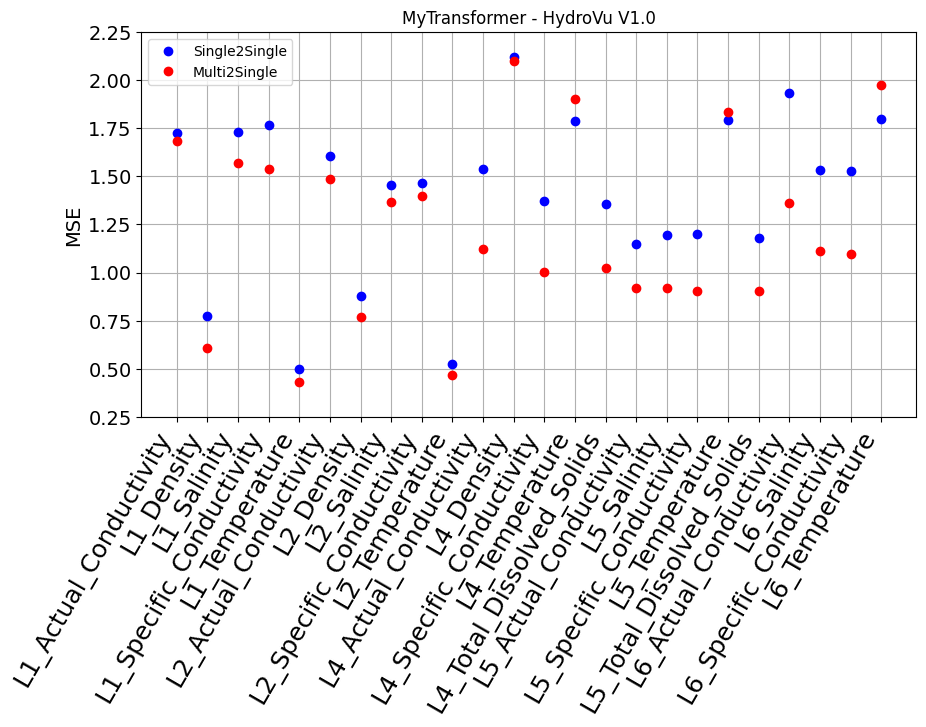

In [13]:
# parameters' name from /home/abgo/Desktop/Codes/SimpleDL/PatchTST/PatchTST_supervised/dataset/hydrovu_v1_0.csv
# param_name = ['L_CCT_Amont_VuLink_P_Temperature', 'L_BAM_VuLink_P_Temperature', 'L_4:_CCTAmont_P_Temperature', 'L_1:_Amont_P_Temperature', 'L_Aval_VuLink_P_Temperature', 'L_2:_BAM_P_Temperature', 'L_6:_Aval_P_Temperature', 'L_5:_CCTAval_P_Temperature', 'L_4:_CCTAmont_P_Actual_Conductivity', 'L_1:_Amont_P_Actual_Conductivity', 'L_2:_BAM_P_Actual_Conductivity', 'L_6:_Aval_P_Actual_Conductivity', 'L_5:_CCTAval_P_Actual_Conductivity', 'L_4:_CCTAmont_P_Specific_Conductivity', 'L_1:_Amont_P_Specific_Conductivity', 'L_2:_BAM_P_Specific_Conductivity', 'L_6:_Aval_P_Specific_Conductivity', 'L_5:_CCTAval_P_Specific_Conductivity', 'L_1:_Amont_P_Salinity', 'L_2:_BAM_P_Salinity', 'L_6:_Aval_P_Salinity', 'L_5:_CCTAval_P_Salinity', 'L_4:_CCTAmont_P_Total_Dissolved_Solids', 'L_5:_CCTAval_P_Total_Dissolved_Solids', 'L_4:_CCTAmont_P_Density', 'L_1:_Amont_P_Density', 'L_2:_BAM_P_Density']
# param_name.sort()
plt.figure(figsize=(10,5))
plt.plot(param_name, list_all[0][:-3], 'bo', label='Single2Single') #[:-3] to remove air temporture from the results
plt.plot(param_name, list_all[1][:-3], 'ro', label='Multi2Single') #[:-3] to remove air temporture from the results
# plt.axis([-1, 15, -20, 20])
plt.ylabel('MSE', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=18)
plt.yticks(fontsize=14)
plt.ylim(0.25, 2.25)
plt.legend()
plt.grid()
plt.title("MyTransformer - HydroVu V1.0")
plt.savefig('./MyTransformer_MS.pdf', bbox_inches='tight')
plt.show()

# My Conv Linear
2x 1DConv + Linear
## Weather dataset

0.21696164334813753
0.21276940600503058


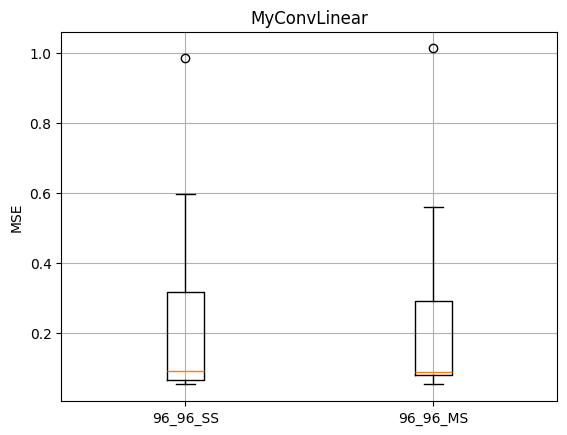

In [6]:
#figure setup
# labels = ["96_96_SS", "96_96_MS", "96_192_SS", "96_192_MS"]
labels = ["96_96_SS", "96_96_MS"]
# labels = ["96_192_SS", "96_192_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for pred_len in [96]:
    folder_path_SS = f'./results/weather_noOutlier_96_{pred_len}_MyConvLinear_custom_ftS_OT*_sl96_ll48_pl{pred_len}_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_MS = f'./results/weather_noOutlier_96_{pred_len}_MyConvLinear_custom_ftMS_OT*_sl96_ll48_pl{pred_len}_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    file_SS = glob.glob(folder_path_SS)
    file_MS = glob.glob(folder_path_MS)

    file_SS.sort()
    file_MS.sort()

    l = []
    #Read file: single2single variate
    for f in file_SS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    print(sum(l) / len(l) )
    #Read file: multi2single variate
    l = []
    for f in file_MS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    print(sum(l) / len(l) )
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('MyConvLinear')
plt.grid()
plt.show()

In [20]:
file_SS[17]

'./results/weather_noOutlier_96_96_MyConvLinear_custom_ftS_OTrho_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'

Text(0.5, 1.0, 'MyConvLinear - weather no Outlier')

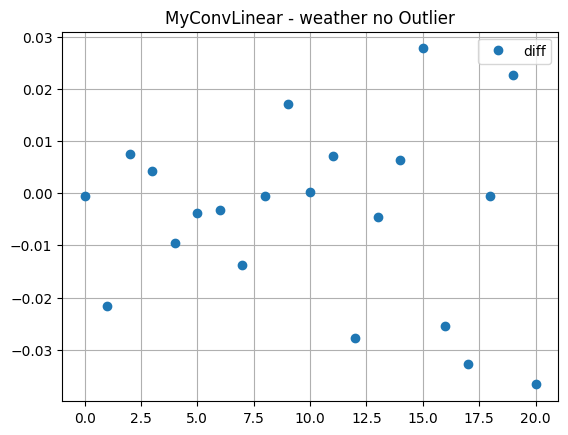

In [32]:
diff = [list_all[1][i] - list_all[0][i] for i in range(len(list_all[1]))]
plt.plot(diff, 'o', label='diff')
# plt.plot(list_all[1], '*', label='MS')
# plt.plot(list_all[0], '*', label='S')
plt.legend()
plt.grid()
plt.title("MyConvLinear - weather no Outlier")

In [33]:
max(diff)

0.027717173

In [ ]:
file_MS

Improvement mean is -6.9671320020612795


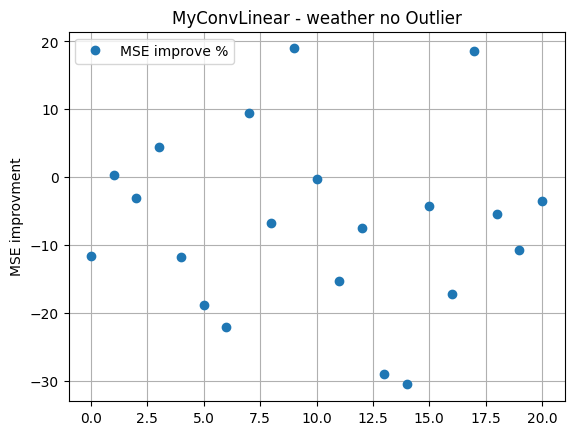

In [8]:
improve = [100 * (list_all[0][i] - list_all[1][i])/list_all[0][i] for i in range(len(list_all[1]))]
plt.plot(improve, 'o', label='MSE improve %')
plt.legend()
plt.grid()
plt.title("MyConvLinear - weather no Outlier")
plt.ylabel('MSE improvment')
print(f'Improvement mean is {sum(improve)/len((improve))}')

In [35]:
print(max(improve), min(improve))

25.992539268781595 -26.074723159993745


In [41]:
pos_imp = [file_MS[e] if i < 0 else 0 for e, i in enumerate(improve)]
# pos_sig = [file_MS[i] if i >=0 else 0 for i in pos_imp]
pos_imp

[0,
 0,
 './results/weather_noOutlier_96_96_MyConvLinear_custom_ftMS_OTPAR_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/weather_noOutlier_96_96_MyConvLinear_custom_ftMS_OTSWDR_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 0,
 0,
 0,
 0,
 0,
 './results/weather_noOutlier_96_96_MyConvLinear_custom_ftMS_OTVPdef_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/weather_noOutlier_96_96_MyConvLinear_custom_ftMS_OTVPmax_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/weather_noOutlier_96_96_MyConvLinear_custom_ftMS_OTmax_PAR_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 0,
 0,
 './results/weather_noOutlier_96_96_MyConvLinear_custom_ftMS_OTrain_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/

Train with only 13 improved time series from last cell 

0.2129812418268277
0.23773952172352716


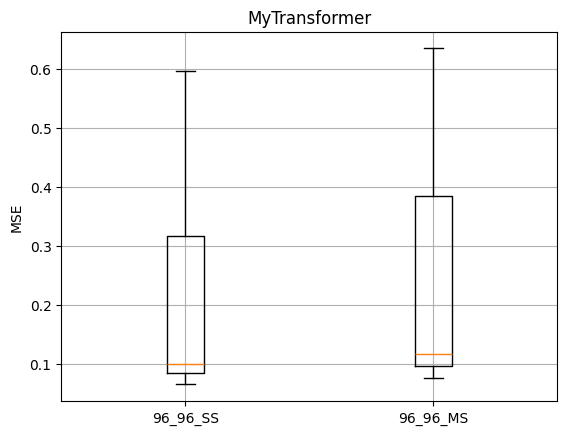

In [23]:
#figure setup
labels = ["96_96_SS", "96_96_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
list_S = []
list_MS = []

e_layers = 6
n_heads = 1
d_model = 8
d_ff = 16
# for pred_len in [96]:

file_SS = []
file_MS = []
for signal in ['p', 'T', 'Tpot', 'Tdew', 'rh', 'VPact', 'sh', 'H2OC', 'rho', 'wv', 'max_wv', 'Tlog', 'OT']:
    folder_path_SS = f'./results/weather_noOutlier_96_96_MyConvLinear_custom_ftS_OT{signal}_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_MS = f'./results/weather_noOutlier_limited13_MyConvLinear_custom_ftMS_OT{signal}_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'

    file_SS.append(glob.glob(folder_path_SS)[0])
    file_MS.append(glob.glob(folder_path_MS)[0])

file_SS.sort()
file_MS.sort()

l = []
#Read file: single2single variate
for f in file_SS:
    mse_S = np.load(f)
    l.append(mse_S[0])
list_all.append(l)
print(sum(l) / len(l) )
#Read file: multi2single variate
l = []
for f in file_MS:
    mse_S = np.load(f)
    l.append(mse_S[0])
list_all.append(l)
print(sum(l) / len(l) )
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('MyTransformer')
plt.grid()
plt.show()

Max Planck Weather Dataset

https://www.kaggle.com/datasets/arashnic/max-planck-weather-dataset?resource=download 

1134.1244024671614
1048.8379001276833


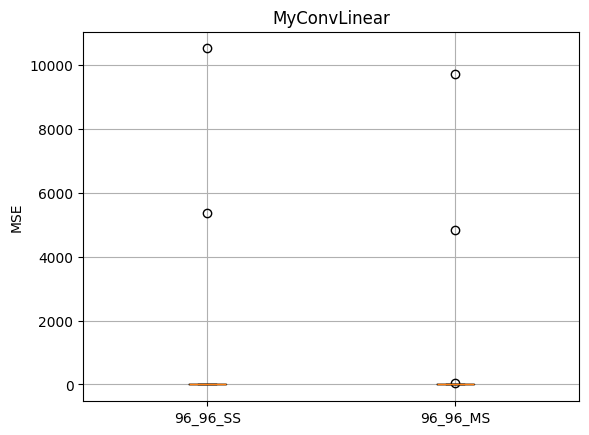

In [14]:
#figure setup
# labels = ["96_96_SS", "96_96_MS", "96_192_SS", "96_192_MS"]
labels = ["96_96_SS", "96_96_MS"]
# labels = ["96_192_SS", "96_192_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for pred_len in [96]:
    folder_path_SS = f'./results/max_planck_weather_ts_MyConvLinear_custom_ftS_OT*_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_MS = f'./results/max_planck_weather_ts_MyConvLinear_custom_ftMS_OT*_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    file_SS = glob.glob(folder_path_SS)
    file_MS = glob.glob(folder_path_MS)

    file_SS.sort()
    file_MS.sort()

    l = []
    #Read file: single2single variate
    for f in file_SS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    print(sum(l) / len(l) )
    #Read file: multi2single variate
    l = []
    for f in file_MS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    print(sum(l) / len(l) )
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('MyConvLinear')
plt.grid()
plt.show()

Text(0.5, 1.0, 'MyConvLinear - max planck weather')

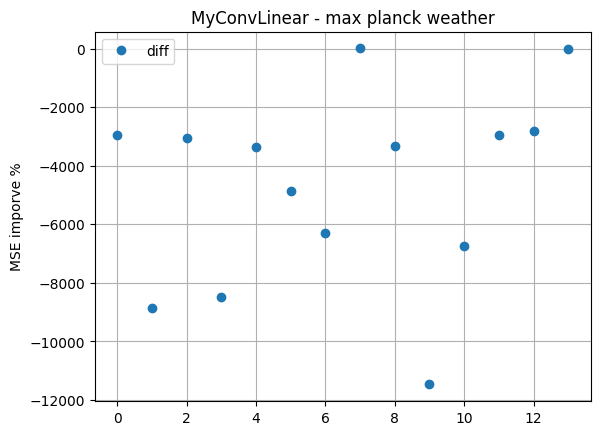

In [9]:
diff = [100 * (list_all[0][i] - list_all[1][i])/list_all[0][i] for i in range(len(list_all[1]))]
plt.plot(diff[:], 'o', label='diff')
# plt.plot(list_all[1], '*', label='MS')
# plt.plot(list_all[0], '*', label='S')
# plt.axis([-1, 15, -20, 20])
plt.ylabel('MSE imporve %')
plt.legend()
plt.grid()
plt.title("MyConvLinear - max planck weather")

In [6]:
file_SS

['./results/max_planck_weather_ts_MyConvLinear_custom_ftS_OTH2OC_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/max_planck_weather_ts_MyConvLinear_custom_ftS_OTT_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/max_planck_weather_ts_MyConvLinear_custom_ftS_OTTdew_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/max_planck_weather_ts_MyConvLinear_custom_ftS_OTTpot_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/max_planck_weather_ts_MyConvLinear_custom_ftS_OTVPact_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/max_planck_weather_ts_MyConvLinear_custom_ftS_OTVPdef_sl96_ll48_pl96_dm32_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy',
 './results/max_planck_weather_ts_MyConvLinear_custom_ftS_OTVPmax_sl96_

## HydroVu dataset V1.0

1.3712103329598904
1.1860715424021084
13.501852057819745 %
1.376276470720768
1.1856308939556282
13.852273203893187 %
1.392755492279927
1.1905366703867912
14.519334011895051 %


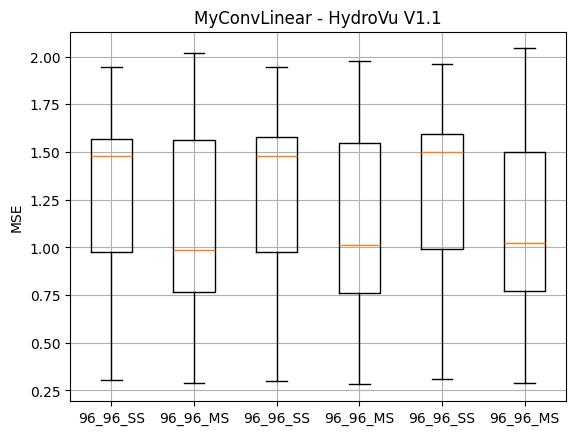

In [7]:
#figure setup
# labels = ["96_96_SS", "96_96_MS", "96_192_SS", "96_192_MS"]
labels = ["96_96_SS", "96_96_MS", "96_96_SS", "96_96_MS", "96_96_SS", "96_96_MS"]
# labels = ["96_192_SS", "96_192_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for random_seed in [2021, 42, 2040]:
    folder_path_SS = f'./results/hydrovu_v1_0_MyConvLinear_custom_ftS_OT*_sl96_ll48_pl{pred_len}_dm8_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0_rnd{random_seed}/mse_individual.npy'
    folder_path_MS = f'./results/hydrovu_v1_0_MyConvLinear_custom_ftMS_OT*_sl96_ll48_pl{pred_len}_dm8_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0_rnd{random_seed}/mse_individual.npy'
    file_SS = glob.glob(folder_path_SS)
    file_MS = glob.glob(folder_path_MS)

    file_SS.sort()
    file_MS.sort()

    l = []
    #Read file: single2single variate
    for f in file_SS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    # mean_SS = sum(l) / len(l) 
    mean_SS = sum(l[:-3]) / len(l[:-3]) #to remove air temporture from the results
    print(mean_SS)
    #Read file: multi2single variate
    l = []
    for f in file_MS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    # mean_MS = sum(l) / len(l) 
    mean_MS = sum(l[:-3]) / len(l[:-3]) #to remove air temporture from the results 
    print(mean_MS)
    print(100 * (mean_SS - mean_MS)/mean_SS, '%')

plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('MyConvLinear - HydroVu V1.1')
plt.grid()
plt.show()

Text(0.5, 1.0, 'MyConvLinear - HydroVu V1.1')

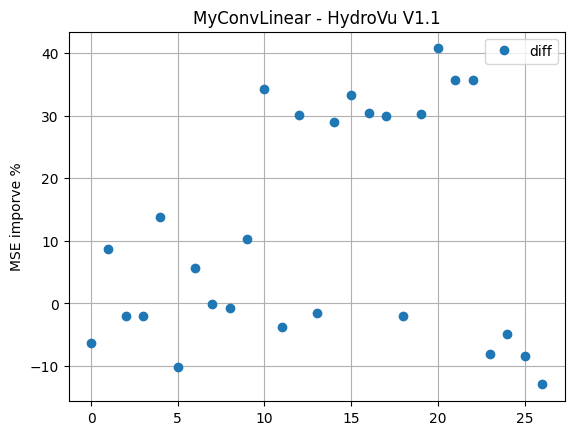

In [19]:
diff = [100 * (list_all[0][i] - list_all[1][i])/list_all[0][i] for i in range(len(list_all[1]))]
plt.plot(diff[:], 'o', label='diff')
# plt.plot(list_all[1], '*', label='MS')
# plt.plot(list_all[0], '*', label='S')
# plt.axis([-1, 15, -20, 20])
plt.ylabel('MSE imporve %')
plt.legend()
plt.grid()
plt.title("MyConvLinear - HydroVu V1.1")

In [8]:
# param_name = ['L1_Actual_Conductivity', 'L1_Density', 'L1_Salinity', 'L1_Specific_Conductivity', 'L1_Temperature', 'L2_Actual_Conductivity', 'L2_Density', 'L2_Salinity', 'L2_Specific_Conductivity', 'L2_Temperature', 'L4_Actual_Conductivity', 'L4_Density', 'L4_Specific_Conductivity', 'L4_Temperature', 'L4_Total_Dissolved_Solids', 'L5_Actual_Conductivity', 'L5_Salinity', 'L5_Specific_Conductivity', 'L5_Temperature', 'L5_Total_Dissolved_Solids', 'L6_Actual_Conductivity', 'L6_Salinity', 'L6_Specific_Conductivity', 'L6_Temperature', 'L6_Air_Temperature', 'L2_Air_Temperature', 'L4_Air_Temperature']
param_name = ['L1_Actual_Conductivity', 'L1_Density', 'L1_Salinity', 'L1_Specific_Conductivity', 'L1_Temperature', 'L2_Actual_Conductivity', 'L2_Density', 'L2_Salinity', 'L2_Specific_Conductivity', 'L2_Temperature', 'L4_Actual_Conductivity', 'L4_Density', 'L4_Specific_Conductivity', 'L4_Temperature', 'L4_Total_Dissolved_Solids', 'L5_Actual_Conductivity', 'L5_Salinity', 'L5_Specific_Conductivity', 'L5_Temperature', 'L5_Total_Dissolved_Solids', 'L6_Actual_Conductivity', 'L6_Salinity', 'L6_Specific_Conductivity', 'L6_Temperature']

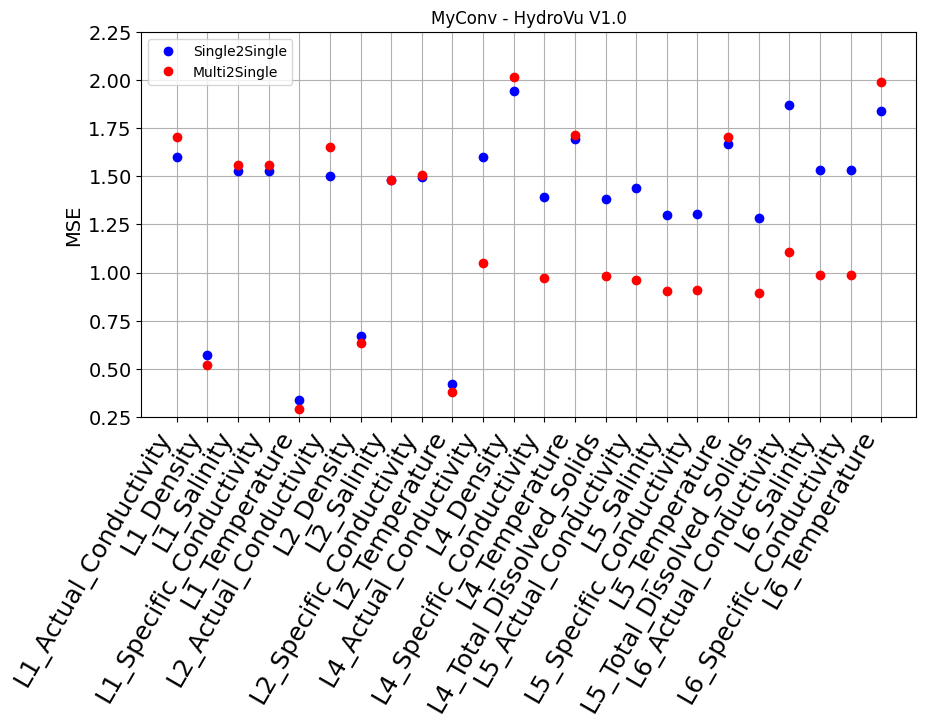

In [11]:
# parameters' name from /home/abgo/Desktop/Codes/SimpleDL/PatchTST/PatchTST_supervised/dataset/hydrovu_v1_0.csv
# param_name = ['L_CCT_Amont_VuLink_P_Temperature', 'L_BAM_VuLink_P_Temperature', 'L_4:_CCTAmont_P_Temperature', 'L_1:_Amont_P_Temperature', 'L_Aval_VuLink_P_Temperature', 'L_2:_BAM_P_Temperature', 'L_6:_Aval_P_Temperature', 'L_5:_CCTAval_P_Temperature', 'L_4:_CCTAmont_P_Actual_Conductivity', 'L_1:_Amont_P_Actual_Conductivity', 'L_2:_BAM_P_Actual_Conductivity', 'L_6:_Aval_P_Actual_Conductivity', 'L_5:_CCTAval_P_Actual_Conductivity', 'L_4:_CCTAmont_P_Specific_Conductivity', 'L_1:_Amont_P_Specific_Conductivity', 'L_2:_BAM_P_Specific_Conductivity', 'L_6:_Aval_P_Specific_Conductivity', 'L_5:_CCTAval_P_Specific_Conductivity', 'L_1:_Amont_P_Salinity', 'L_2:_BAM_P_Salinity', 'L_6:_Aval_P_Salinity', 'L_5:_CCTAval_P_Salinity', 'L_4:_CCTAmont_P_Total_Dissolved_Solids', 'L_5:_CCTAval_P_Total_Dissolved_Solids', 'L_4:_CCTAmont_P_Density', 'L_1:_Amont_P_Density', 'L_2:_BAM_P_Density']
# param_name.sort()
plt.figure(figsize=(10,5))
plt.plot(param_name, list_all[0][:-3], 'bo', label='Single2Single') #[:-3] to remove air temporture from the results
plt.plot(param_name, list_all[1][:-3], 'ro', label='Multi2Single') #[:-3] to remove air temporture from the results
# plt.plot(param_name, list_all[2], 'bo')
# plt.plot(param_name, list_all[3], 'ro')
# plt.plot(param_name, list_all[4], 'bo')
# plt.plot(param_name, list_all[5], 'ro')
# plt.axis([-1, 15, -20, 20])
plt.ylabel('MSE', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=18)
plt.yticks(fontsize=14)
plt.ylim(0.25, 2.25)
plt.legend()
plt.grid()
plt.title("MyConv - HydroVu V1.0")
plt.savefig('./MyConv_MS.pdf', bbox_inches='tight')
plt.show()

## HydroVu V_all

2.4164281825773246
3.3774231211390604


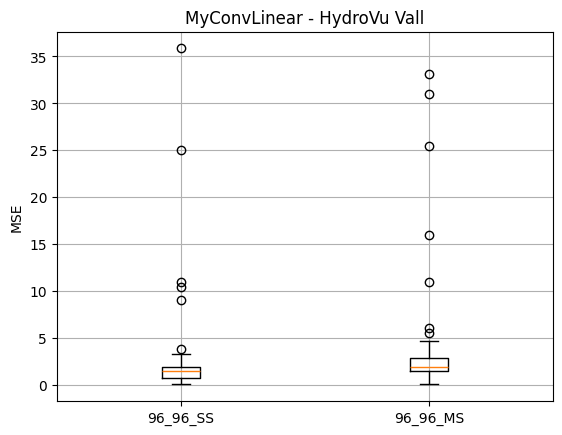

In [11]:
#figure setup
# labels = ["96_96_SS", "96_96_MS", "96_192_SS", "96_192_MS"]
labels = ["96_96_SS", "96_96_MS"]
# labels = ["96_192_SS", "96_192_MS"]
#read data
seq_len = 96
pred_len = 96
list_all = []
for pred_len in [96]:
    folder_path_SS = f'./results/hydrovu_vall_MyConvLinear_custom_ftS_OT*_sl96_ll48_pl96_dm8_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    folder_path_MS = f'./results/hydrovu_vall_MyConvLinear_custom_ftMS_OT*_sl96_ll48_pl96_dm8_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_ind0/mse_individual.npy'
    file_SS = glob.glob(folder_path_SS)
    file_MS = glob.glob(folder_path_MS)

    file_SS.sort()
    file_MS.sort()

    l = []
    #Read file: single2single variate
    for f in file_SS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    print(sum(l) / len(l) )
    #Read file: multi2single variate
    l = []
    for f in file_MS:
        mse_S = np.load(f)
        l.append(mse_S[0])
    list_all.append(l)
    print(sum(l) / len(l) )
plt.boxplot(list_all, tick_labels=labels)
plt.ylabel('MSE')
plt.title('MyConvLinear - HydroVu Vall')
plt.grid()
plt.show()

Text(0.5, 1.0, 'MyConvLinear - HydroVu Vall')

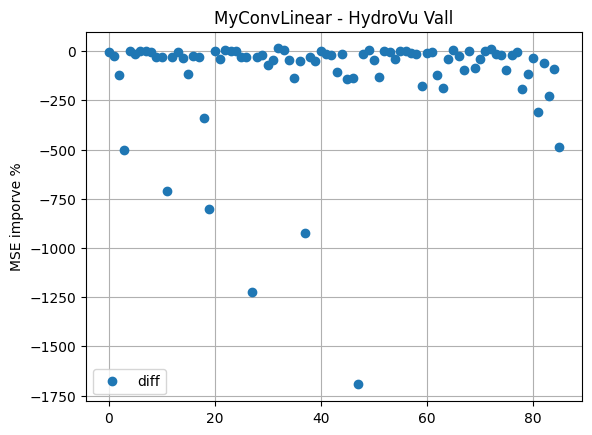

In [16]:
diff = [100 * (list_all[0][i] - list_all[1][i])/list_all[0][i] for i in range(len(list_all[1]))]
plt.plot(diff[:], 'o', label='diff')
# plt.plot(list_all[1], '*', label='MS')
# plt.plot(list_all[0], '*', label='S')
# plt.axis([-3, 90, -20, 20])
plt.ylabel('MSE imporve %')
plt.legend()
plt.grid()
plt.title("MyConvLinear - HydroVu Vall")